In [26]:
# simple statistical analysis
# Author: Grace Guan 12/12/17
# subsection{The distribution of individual-group risk adjustment per member month in the 2014 benefit year}
# subsection{The distribution of individual-group risk adjustment per member month in the 2015 benefit year}
# subsection{The distribution of the difference in individual-group risk adjustment per member month between the 2015 and 2014 benefit years}
# subsection{The distribution of total loss in the 2014 benefit year}
# subsection{The distribution of total loss in the 2015 benefit year}
# subsection{The correlation between total loss and the difference in individual-group risk adjustment per member month between the 2015 and 2014 benefit years}
# subsection{The correlation between individual-group risk adjustment per member month in the 2014 benefit year and individual-group risk adjustment per member month in the 2015 benefit year}
# subsection{Basic statistics (such as mean, median, standard deviation, etc.) and outliers}


import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr   

# sample usage
#a = [1,4,6]
#b = [1,2,3]   
#print(pearsonr(a,b))

In [44]:
# import the datasets
df14 = pd.read_csv("2014_final_losscalcforpaper.csv", low_memory=False)
df15 = pd.read_csv("2015_final_losscalcforpaper.csv", low_memory=False)

# remove errors
df14 = df14.replace(['#DIV/0!', '#VALUE!', 'N/E', '$-', 'N/A_MA_Issuer', 'N/A_DefaultCharge'], np.nan)
df15 = df15.replace(['#DIV/0!', '#VALUE!', 'N/E', '$-', 'N/A_MA_Issuer', 'N/A_DefaultCharge'], np.nan)

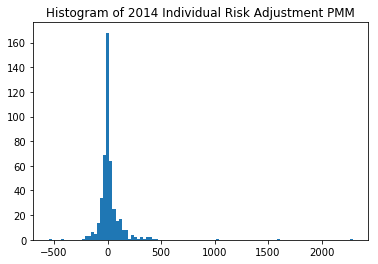

In [45]:
# The distribution of individual-group risk adjustment per member month in the 2014 benefit year
part1 = pd.to_numeric(df14["ARAIPMM"]).dropna(how='any')

plt.hist(part1,100)

plt.title('Histogram of 2014 Individual Risk Adjustment PMM')

#plt.axis([-500, 500, 0, 100])
plt.show()

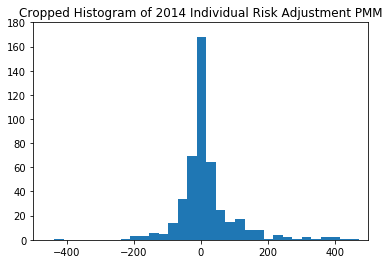

In [46]:
# The distribution of individual-group risk adjustment per member month in the 2014 benefit year
part1 = pd.to_numeric(df14["ARAIPMM"]).dropna(how='any')

plt.hist(part1,100)

plt.title('Cropped Histogram of 2014 Individual Risk Adjustment PMM')

plt.axis([-500, 500, 0, 180])
plt.show()

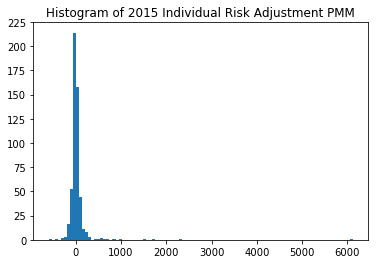

In [47]:
# The distribution of individual-group risk adjustment per member month in the 2015 benefit year
part1 = pd.to_numeric(df15["ARAIPMM"]).dropna(how='any')

plt.hist(part1,100)

plt.title('Histogram of 2015 Individual Risk Adjustment PMM')

#plt.axis([-500, 500, 0, 100])
plt.show()

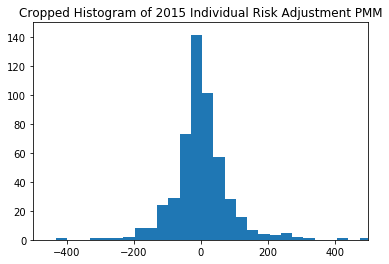

In [48]:
# The distribution of individual-group risk adjustment per member month in the 2015 benefit year
part1 = pd.to_numeric(df15["ARAIPMM"]).dropna(how='any')

plt.hist(part1,200)

plt.title('Cropped Histogram of 2015 Individual Risk Adjustment PMM')

plt.axis([-500, 500, 0, 150])
plt.show()

In [49]:
combined = pd.merge(df14, df15, on='HIOS')

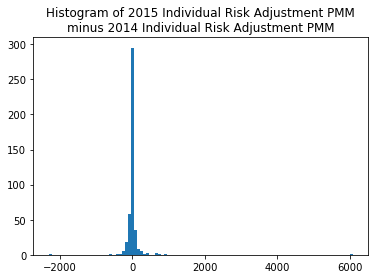

In [50]:
# The distribution of the difference in individual-group risk adjustment per member month between the 2015 and 2014 benefit years
part1 = (pd.to_numeric(combined["ARAIPMM_y"]) - pd.to_numeric(combined["ARAIPMM_x"])).dropna(how='any')

plt.hist(part1,100)

plt.title('Histogram of 2015 Individual Risk Adjustment PMM\nminus 2014 Individual Risk Adjustment PMM')

#plt.axis([-500, 500, 0, 150])
plt.show()

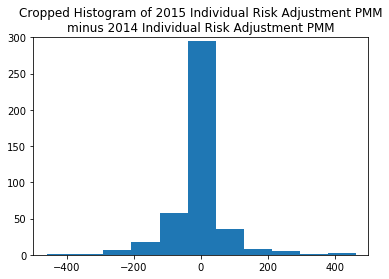

In [51]:
# The distribution of the difference in individual-group risk adjustment per member month between the 2015 and 2014 benefit years
part1 = (pd.to_numeric(combined["ARAIPMM_y"]) - pd.to_numeric(combined["ARAIPMM_x"])).dropna(how='any')

plt.hist(part1,100)

plt.title('Cropped Histogram of 2015 Individual Risk Adjustment PMM\nminus 2014 Individual Risk Adjustment PMM')

plt.axis([-500, 500, 0, 300])
plt.show()

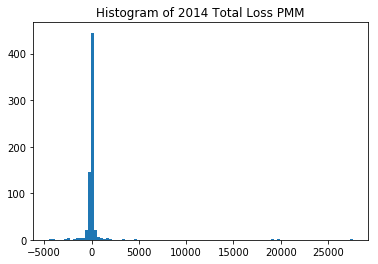

In [52]:
# The distribution of total loss in the 2014 benefit year
part1 = (pd.to_numeric(df14["TotalLoss"])).dropna(how='any')

plt.hist(part1,100)

plt.title('Histogram of 2014 Total Loss PMM')

#plt.axis([-500, 500, 0, 300])
plt.show()

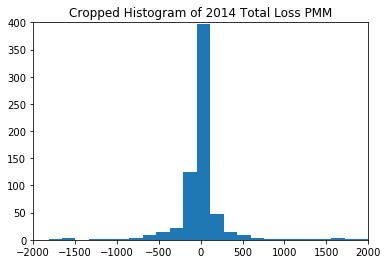

In [56]:
# The distribution of total loss in the 2014 benefit year
part1 = (pd.to_numeric(df14["TotalLoss"])).dropna(how='any')

plt.hist(part1,200)

plt.title('Cropped Histogram of 2014 Total Loss PMM')

plt.axis([-2000, 2000, 0, 400])
plt.show()

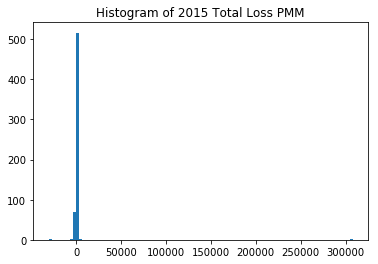

In [57]:
# The distribution of total loss in the 2015 benefit year
part1 = (pd.to_numeric(df15["TotalLoss"])).dropna(how='any')

plt.hist(part1,100)

plt.title('Histogram of 2015 Total Loss PMM')

#plt.axis([-500, 500, 0, 300])
plt.show()

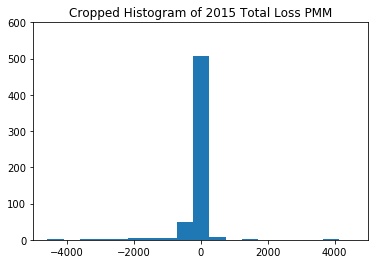

In [65]:
# The distribution of total loss in the 2015 benefit year
part1 = (pd.to_numeric(df15["TotalLoss"])).dropna(how='any')

plt.hist(part1,700)

plt.title('Cropped Histogram of 2015 Total Loss PMM')

plt.axis([-5000, 5000, 0, 600])
plt.show()

438


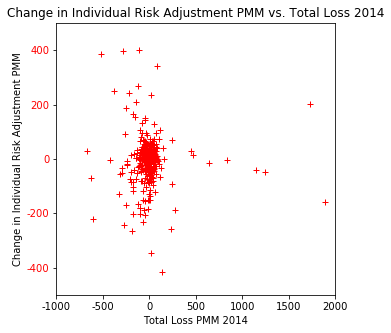

In [77]:
# The correlation between total loss and the difference in individual-group risk adjustment per member month between the 2015 and 2014 benefit years

part = combined[['TotalLoss_x','ARAIPMM_y','ARAIPMM_x']].dropna()
print(len(part))

matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax1 = plt.subplots(figsize=(5, 5))
ax1.set_title('Change in Individual Risk Adjustment PMM vs. Total Loss 2014')

ax1.plot(part["TotalLoss_x"], 
         pd.to_numeric(part["ARAIPMM_y"])-pd.to_numeric(part["ARAIPMM_x"]), '+', color='r')
ax1.set_xlabel('Total Loss PMM 2014')
ax1.set_ylabel('Change in Individual Risk Adjustment PMM')


# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None
color_y_axis(ax1, 'r')

ax1.set_xlim([-1000,2000])
ax1.set_ylim([-500,500])
plt.show()

In [78]:
print(pearsonr(pd.to_numeric(part["TotalLoss_x"]), 
               (pd.to_numeric(part["ARAIPMM_y"])-pd.to_numeric(part["ARAIPMM_x"]))))

(-0.11438593601116386, 0.016622863240451532)


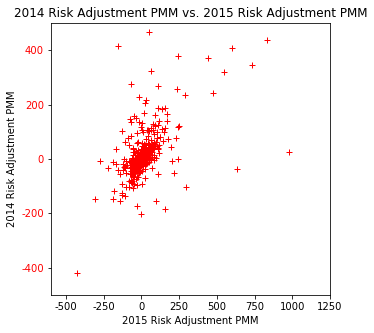

In [82]:
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax1 = plt.subplots(figsize=(5, 5))
ax1.set_title('2014 Risk Adjustment PMM vs. 2015 Risk Adjustment PMM')

ax1.plot(part["ARAIPMM_y"], 
         part["ARAIPMM_x"], '+', color='r')
ax1.set_xlabel('2015 Risk Adjustment PMM')
ax1.set_ylabel('2014 Risk Adjustment PMM')


# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None
color_y_axis(ax1, 'r')

ax1.set_xlim([-600,1250])
ax1.set_ylim([-500,500])
plt.show()

In [83]:
print(pearsonr(pd.to_numeric(part["ARAIPMM_y"]), pd.to_numeric(part["ARAIPMM_x"])))

(0.3186843102660693, 8.5284437881135634e-12)


In [86]:
# import the datasets
df14 = pd.read_csv("2014_final_losscalcforpaper.csv", low_memory=False)
df15 = pd.read_csv("2015_final_losscalcforpaper.csv", low_memory=False)

# remove errors
df14 = df14.replace(['#DIV/0!', '#VALUE!', 'N/E', '$-', 'N/A_MA_Issuer', 'N/A_DefaultCharge'], np.nan)
df15 = df15.replace(['#DIV/0!', '#VALUE!', 'N/E', '$-', 'N/A_MA_Issuer', 'N/A_DefaultCharge'], np.nan)

# basic statistics, etc.
numeric_cols = ['MMI', 'ERAI', 'ARAI', 'ERAIPMM', 'ARAIPMM', 'Diff', 'TotalLoss']

for col in numeric_cols:
    df14[col] = pd.to_numeric(df14[col])
    df15[col] = pd.to_numeric(df15[col])
    print(col + "\t" + str(df14[col].mean()) + "\t" + str(df15[col].mean()) +
         "\t" + str(df14[col].median()) + "\t" + str(df15[col].median()) + 
         "\t" + str(df14[col].std()) + "\t" + str(df15[col].std()) + 
         "\t" + str(df14[col].min()) + "\t" + str(df15[col].min()) +
         "\t" + str(df14[col].max()) + "\t" + str(df15[col].max()) +
         "\t" + str(df14[col].sum()) + "\t" + str(df15[col].sum()))

MMI	129068.3535433071	197319.3717693837	49.0	1650.0	571308.9450302229	738379.7924060349	0.0	0.0	9694097.0	11485974.0	163916809.0	198503288.0
ERAI	-30588.876448040133	-55273.84991489255	0.0	0.0	13312771.001348348	20934625.64561306	-181649910.0	-218903904.1	195610300.2	368933331.0	-35911340.94999912	-51957418.919998996
ARAI	-11429.01659388412	142675.38894433537	71612.47	1509.65	21906792.977200806	27963781.79009321	-181692588.01	-218903904.11	221628751.9	368933330.53	-5234489.599998927	74333877.63999873
ERAIPMM	14.665378900445765	21.885525423728847	0.0	0.07	137.47821197574677	323.55241142593377	-551.79	-1557.35	2292.67	6120.33	9869.8	12912.46000000002
ARAIPMM	25.32608225108225	30.41954372623571	2.275	0.095	163.85426879320113	323.64152769881036	-551.79	-600.91	2292.68	6120.33	11700.65	16000.679999999982
Diff	0.9903728070175436	3.155304182509505	1.0	0.0	0.12872866619628612	33.417513683164394	0.0	-127.21	1.57	641.58	451.6099999999999	1659.6899999999996
TotalLoss	74.54520059435359	358.8028474